# Running first Tests with Parcels

## Setup

In [1]:
import xarray as xr
import cmocean as cmo

from datetime import datetime, timedelta

import numpy as np

import parcels

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt

In [2]:
# Load ETOPO1
ds_bath = xr.open_dataset("/albedo/work/user/quraus001/bath/ETOPO_2022_v1_60s_N90W180_bed.nc")

# Crop to Fram Strait region
ds_fram_bath = ds_bath.sel(
    lon=slice(-35, 35),    
    lat=slice(70, 85)      
)

## Quick look at the model data

In [3]:
# Gridded example file from Claudia at 100m depth
#file = "/albedo/work/projects/oce_rio/cwekerle/result/Arc22_sub_daily/gridded_python/Arc22.gridded_100m_oce_2006_2009_new.nc"
#file = "/albedo/work/user/quraus001/processed_data/gridded/Arc40.2002.oce.mean.sub_gridded_withdepth_float.nc" #
file = "/albedo/work/user/quraus001/processed_data/gridded/Arc40-2002-gridded_0m_converted-time.nc"
ds_model = xr.open_dataset(file)

In [5]:
file2 = "/albedo/work/projects/oce_rio/cwekerle/result/Arc22_sub_daily/gridded_python/Arc22.gridded_100m_oce_2006_2009_new.nc"
ds_model2 = xr.open_dataset(file2)

In [6]:
ds_model2

<xarray.Dataset> Size: 39GB
Dimensions:      (time: 1460, latitude: 825, longitude: 800, depth_coord: 1)
Coordinates:
  * latitude     (latitude) float64 7kB 75.0 75.01 75.02 ... 82.48 82.49 82.5
  * longitude    (longitude) float64 6kB -20.0 -19.95 -19.9 ... 19.9 19.95 20.0
  * depth_coord  (depth_coord) float64 8B 100.0
  * time         (time) datetime64[ns] 12kB 2006-01-02 2006-01-03 ... 2010-01-01
Data variables:
    day          (time) float64 12kB ...
    thetao       (time, depth_coord, latitude, longitude) float64 8GB ...
    so           (time, depth_coord, latitude, longitude) float64 8GB ...
    uo           (time, depth_coord, latitude, longitude) float64 8GB ...
    vo           (time, depth_coord, latitude, longitude) float64 8GB ...
    zos          (time, latitude, longitude) float64 8GB ...
Attributes:
    history:                   Tue Sep 26 11:38:33 2017: ncap -O -s day=time/...
    nco_openmp_thread_number:  1

In [7]:
ds_model

<xarray.Dataset> Size: 8GB
Dimensions:  (time: 365, lat: 825, lon: 800)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2001-12-31T23:57:30 ... 2002-12-30T23:...
  * lat      (lat) float64 7kB 75.0 75.01 75.02 75.03 ... 82.47 82.48 82.49 82.5
  * lon      (lon) float64 6kB -20.0 -19.95 -19.9 -19.85 ... 19.9 19.95 20.0
Data variables:
    temp     (time, lat, lon) float64 2GB ...
    salt     (time, lat, lon) float64 2GB ...
    u        (time, lat, lon) float64 2GB ...
    v        (time, lat, lon) float64 2GB ...

In [10]:
import cftime
import numpy as np

ds_model = xr.open_dataset("/albedo/work/user/quraus001/processed_data/gridded/Arc40.2002.oce.mean.sub_gridded.nc")

# Define a reference date (can be 2000-01-01 or match the model start date)
ref_time = cftime.DatetimeNoLeap(2000, 1, 1)

# Use `.astype("O")` to safely loop over datetimes
time_vals = ds_model.time.values.astype("O")
converted_time = np.array([(t - ref_time).total_seconds() for t in time_vals])

# Replace the time variable
ds_model["time"] = ("time", converted_time)
ds_model["time"].attrs["units"] = "seconds since 2000-01-01 00:00:00"
ds_model["time"].attrs["calendar"] = "standard"  # instead of "noleap"
# Save to new NetCDF

ds_model.to_netcdf("/albedo/work/user/quraus001/processed_data/gridded/Arc40-2002-gridded_0m_converted-time.nc")

  0%|          | 0/8640000.0 [04:52<?, ?it/s]


In [45]:
ds_model = xr.open_dataset("/albedo/work/user/quraus001/processed_data/gridded/Arc40-2002-gridded_0m_converted-time.nc")

# replace u and v fields with a constand field (of maybe a gradient increasing from west to east)

row_gradient_u = np.linspace(0, -0.1, ds_model.u.shape[2])
row_gradient_v = np.linspace(0, 0.1, ds_model.u.shape[2])
gradient_field_u = np.tile(row_gradient_u, (ds_model.u.shape[1], 1))
gradient_field_v = np.tile(row_gradient_v, (ds_model.u.shape[1], 1))

for time in range(len(ds_model.time)):
    ds_model.u[time,:,:] = gradient_field_u
    ds_model.v[time,:,:] = gradient_field_v
ds_model.to_netcdf("/albedo/work/user/quraus001/processed_data/gridded/Arc40-2002-gridded_0m_converted-time_gradient-test2.nc")

 15%|█▌        | 1297800.0/8640000.0 [03:26<19:28, 6281.08it/s]  


In [3]:
ds_model = xr.open_dataset("/albedo/work/user/quraus001/processed_data/gridded/Arc40-2002-gridded_0m_converted-time_gradient-test2.nc")

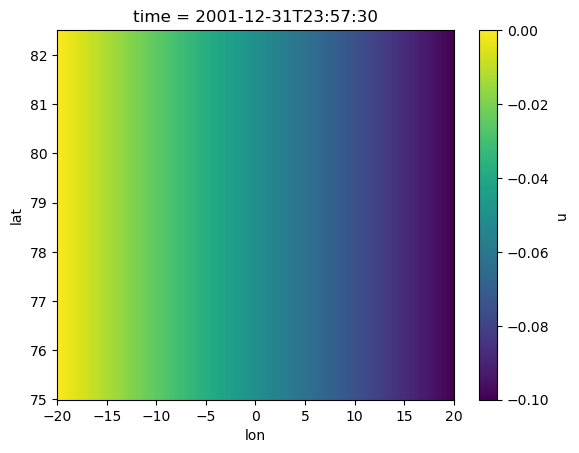

In [4]:
ds_model.u.isel(time=0).plot()

In [80]:
print(fieldset.U.time_origin)

AttributeError: 'Field' object has no attribute 'time_origin'

In [85]:
ds_model

<xarray.Dataset> Size: 4GB
Dimensions:  (depth: 1, time: 365, lat: 825, lon: 800)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2001-12-31T23:57:30 ... 2002-12-30T23:...
  * lat      (lat) float64 7kB 75.0 75.01 75.02 75.03 ... 82.47 82.48 82.49 82.5
  * lon      (lon) float64 6kB -20.0 -19.95 -19.9 -19.85 ... 19.9 19.95 20.0
  * depth    (depth) float32 4B 0.0
Data variables:
    temp     (depth, time, lat, lon) float32 964MB ...
    salt     (depth, time, lat, lon) float32 964MB ...
    u        (depth, time, lat, lon) float32 964MB ...
    v        (depth, time, lat, lon) float32 964MB ...

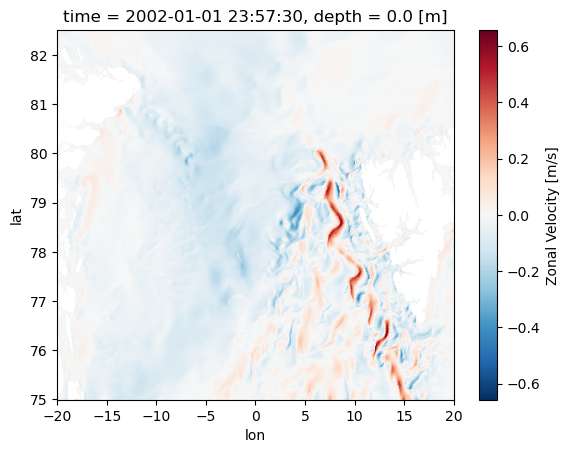

In [ ]:
ds_model.u.isel(time=0).plot()

### Calculate Vorticity Offline

In [6]:
U = ds['uo']
V = ds['vo']

# Compute derivatives directly; xarray handles broadcasting if coords are properly defined
dVdx = V.differentiate('longitude')
dUdy = U.differentiate('latitude')

# Relative vorticity: dV/dx - dU/dy
vorticity = dVdx - dUdy
vorticity.name = "vorticity"

# Save to NetCDF
#vorticity.to_netcdf("/albedo/work/user/quraus001/processed_data/gridded/vorticity-test_Arc22.gridded_100m_oce_2006_2009_new.nc")

In [9]:
vorticity.to_netcdf("/albedo/work/user/quraus001/processed_data/gridded/vorticity-test_Arc22.gridded_100m_oce_2006_2009_new.nc")

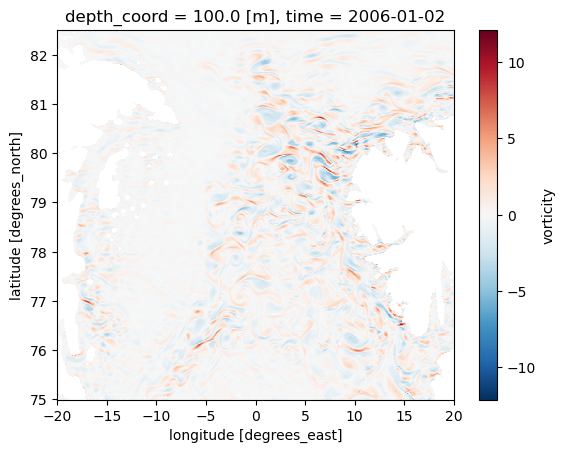

In [8]:
vorticity.isel(time=0).plot()

In [4]:
ds_vort = xr.open_dataset("/albedo/work/user/quraus001/processed_data/gridded/vorticity-test_Arc22.gridded_100m_oce_2006_2009_new.nc")
ds_vort

<xarray.Dataset> Size: 8GB
Dimensions:      (latitude: 825, longitude: 800, depth_coord: 1, time: 1460)
Coordinates:
  * latitude     (latitude) float64 7kB 75.0 75.01 75.02 ... 82.48 82.49 82.5
  * longitude    (longitude) float64 6kB -20.0 -19.95 -19.9 ... 19.9 19.95 20.0
  * depth_coord  (depth_coord) float64 8B 100.0
  * time         (time) datetime64[ns] 12kB 2006-01-02 2006-01-03 ... 2010-01-01
Data variables:
    vorticity    (time, depth_coord, latitude, longitude) float64 8GB ...

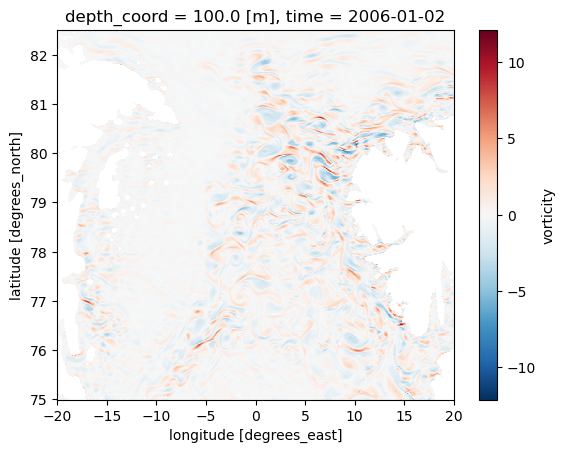

In [5]:
ds_vort.vorticity.isel(time=0).plot()

## Parcels Setup

In [3]:
#inpath = "/albedo/work/projects/oce_rio/cwekerle/result/Arc22_sub_daily/gridded_python/"
inpath = "/albedo/work/user/quraus001/processed_data/gridded/"
#file   = "Arc40.2002.oce.mean.sub_gridded.nc"#"Arc22.gridded_100m_oce_2006_2009_new.nc"
file = "Arc40.2002.oce.mean.sub_gridded_new.nc"
#fname  = f"{inpath}/Arc40.2002.oce.mean.sub_gridde*.nc"
#filenames = {"U": fname, "V": fname, }

outpath  = "/albedo/home/quraus001/FESOM-FS-subduction/outdata/"
outfname = "surface-test"
outfile  = f"{outpath}{outfname}.zarr"

In [4]:
filenames = {
    'U': inpath +file,
    'V': inpath +file,
    "T": inpath +file,
    "S": inpath +file,
    #"vorticity": "/albedo/work/user/quraus001/processed_data/gridded/vorticity-test_Arc22.gridded_100m_oce_2006_2009_new.nc",
}

variables = {
    'U': 'u',
    'V': 'v',
    "T": 'temp',
    "S": 'salt',
    #"vorticity": 'vorticity',
}

dimensions = {
    'lon': 'lon',
    'lat': 'lat',
    'time': 'time',
    #'depth': 'depth',
}

fieldset = parcels.FieldSet.from_netcdf(
    filenames,
    variables,
    dimensions,
    #indices={'depth': [0]},  # fixed 0m layer
    allow_time_extrapolation=True
)

## Particle Setup

In [5]:
fieldset.time_origin.time_origin

cftime.DatetimeNoLeap(2002, 1, 1, 23, 57, 30, 0, has_year_zero=True)

In [6]:
from parcels import AdvectionRK4 
from parcels import JITParticle, Variable

# STEP 1: Set up your particle release locations
n = 20                               # number of particles 
lons = np.linspace(0,10,n)#np.full(n, 3)                 
lats = np.full(n, 78.3)#np.linspace(78, 80, n)
depths = np.full(n, 0.0)           # all at 100m depth (fixed layer)

from datetime import timedelta

#start_datetime = fieldset.time_origin.time_origin + timedelta(days=90)
#start_time = (start_datetime - fieldset.time_origin.fulltime).total_seconds()
# STEP 2: Create the ParticleSet

class SampleParticle(JITParticle):
    #vorticity = Variable('vorticity', dtype=np.float32)
    temperature = Variable('temperature', dtype=np.float32, initial=np.nan)
    salinity    = Variable('salinity', dtype=np.float32, initial=np.nan)
    velocity    = Variable('velocity', dtype=np.float32, initial=np.nan)
    u           = Variable('u', dtype=np.float32, initial=np.nan)
    v           = Variable('v', dtype=np.float32, initial=np.nan)

pset = parcels.ParticleSet.from_list(
    fieldset=fieldset,
    pclass=SampleParticle,#parcels.JITParticle,
    lon=lons,
    lat=lats,
    depth=depths,
    #time = start_time
    #allow_time_extrapolation=True
)

### Write Kernels

In [7]:
def SampleTS(particle, fieldset, time):
    particle.temperature = fieldset.T[time, particle.depth, particle.lat, particle.lon]
    particle.salinity = fieldset.S[time, particle.depth, particle.lat, particle.lon]
    #particle.vorticity = fieldset.vorticity[time, particle.depth, particle.lat, particle.lon]

def SampleVelocity(particle, fieldset, time):
    # calculate velocity magnitude from u and v
    u = fieldset.U[time, particle.depth, particle.lat, particle.lon]
    v = fieldset.V[time, particle.depth, particle.lat, particle.lon]
    # u, v = fieldset.UV[time, particle.depth, particle.lat, particle.lon]
    particle.u = u
    particle.v = v
    particle.velocity = (u**2 + v**2)**0.5

def PrintInitialVelocity(particle, fieldset, time):
    u = fieldset.U[time, particle.depth, particle.lat, particle.lon]
    v = fieldset.V[time, particle.depth, particle.lat, particle.lon]
    print(f"Initial velocity for particle {particle.id}: u={u:.5f}, v={v:.5f}")


## Compute trajectories

In [24]:
pset.execute(PrintInitialVelocity, runtime=0, dt=0)


/albedo/home/quraus001/miniforge3/envs/parcels/lib/python3.13/site-packages/parcels/field.py:1180: RuntimeWarning: Sampling of velocities should normally be done using fieldset.UV or fieldset.UVW object; tread carefully
  self._check_velocitysampling()


RuntimeError: This print statement is not supported

In [27]:
from parcels import FieldSet, ParticleSet, JITParticle, Variable
import numpy as np

# Step 1: Define a custom Particle class with variables to store velocity
class MyParticle(JITParticle):
    uvel = Variable('uvel', dtype=np.float32, initial=0.)
    vvel = Variable('vvel', dtype=np.float32, initial=0.)

# Step 2: Define a kernel to sample u and v from the fieldset
def SampleVelocity(particle, fieldset, time):
    particle.uvel = fieldset.U[time, particle.depth, particle.lat, particle.lon]
    particle.vvel = fieldset.V[time, particle.depth, particle.lat, particle.lon]

# Step 3: Build or load your fieldset (replace with your data)
# Example synthetic field (if you don't already have one)
lon = np.linspace(0, 1, 3)
lat = np.linspace(0, 1, 3)
time = np.array([0])
data = {'U': np.ones((1, 3, 3)), 'V': np.ones((1, 3, 3)) * 2}
dimensions = {'lon': lon, 'lat': lat, 'time': time}
fieldset = FieldSet.from_data(data, dimensions, mesh='flat')

# Step 4: Create a ParticleSet using the custom class
pset = ParticleSet.from_list(fieldset=fieldset,
                             pclass=MyParticle,
                             lon=lons,
                             lat=lats)

# Step 5: Execute the sampling kernel once (no time stepping)
pset.execute(SampleVelocity, runtime=0, dt=timedelta(minutes=30))

# Step 6: Print the sampled u and v values for debugging
for p in pset:
    print(f"Particle {p.id} at (lat: {p.lat:.2f}, lon: {p.lon:.2f}) → u: {p.uvel:.5f}, v: {p.vvel:.5f}")


/albedo/home/quraus001/miniforge3/envs/parcels/lib/python3.13/site-packages/parcels/field.py:1180: RuntimeWarning: Sampling of velocities should normally be done using fieldset.UV or fieldset.UVW object; tread carefully
  self._check_velocitysampling()


0it [00:00, ?it/s]
Particle 40 at (lat: 78.30, lon: 0.00) → u: 0.00000, v: 0.00000
Particle 41 at (lat: 78.30, lon: 0.53) → u: 0.00000, v: 0.00000
Particle 42 at (lat: 78.30, lon: 1.05) → u: 0.00000, v: 0.00000
Particle 43 at (lat: 78.30, lon: 1.58) → u: 0.00000, v: 0.00000
Particle 44 at (lat: 78.30, lon: 2.11) → u: 0.00000, v: 0.00000
Particle 45 at (lat: 78.30, lon: 2.63) → u: 0.00000, v: 0.00000
Particle 46 at (lat: 78.30, lon: 3.16) → u: 0.00000, v: 0.00000
Particle 47 at (lat: 78.30, lon: 3.68) → u: 0.00000, v: 0.00000
Particle 48 at (lat: 78.30, lon: 4.21) → u: 0.00000, v: 0.00000
Particle 49 at (lat: 78.30, lon: 4.74) → u: 0.00000, v: 0.00000
Particle 50 at (lat: 78.30, lon: 5.26) → u: 0.00000, v: 0.00000
Particle 51 at (lat: 78.30, lon: 5.79) → u: 0.00000, v: 0.00000
Particle 52 at (lat: 78.30, lon: 6.32) → u: 0.00000, v: 0.00000
Particle 53 at (lat: 78.30, lon: 6.84) → u: 0.00000, v: 0.00000
Particle 54 at (lat: 78.30, lon: 7.37) → u: 0.00000, v: 0.00000
Particle 55 at (lat: 

In [31]:
print("U field lon range: ", fieldset.U.lon[0], "to", fieldset.U.lon[-1])
print("U field lat range: ", fieldset.U.lat[0], "to", fieldset.U.lat[-1])


U field lon range:  0.0 to 1.0
U field lat range:  0.0 to 1.0


In [32]:
print(fieldset.U.lon.min(), fieldset.U.lon.max())
print(fieldset.U.lat.min(), fieldset.U.lat.max())

0.0 1.0
0.0 1.0


In [30]:
print("Sample U value:", fieldset.U[0, 0, 78.3, 5.0])
print("Sample V value:", fieldset.V[0, 0, 78.3, 5.0])

/albedo/home/quraus001/miniforge3/envs/parcels/lib/python3.13/site-packages/parcels/field.py:1138: RuntimeWarning: Sampling of velocities should normally be done using fieldset.UV or fieldset.UVW object; tread carefully
  self._check_velocitysampling()


RuntimeError: Error interpolating field 'U'.
Field sampled out-of-bound, at (depth=0, lat=78.3, lon=5.0). Error could not be handled because particle was not part of the Field Sampling.

In [13]:
pset.execute(
    [AdvectionRK4, SampleTS, SampleVelocity],
    runtime=timedelta(days=30),  #100           
    dt=timedelta(minutes=30),              
    output_file=pset.ParticleFile(name=outfname, outputdt=timedelta(hours=12)) #hours=12
)

/albedo/home/quraus001/miniforge3/envs/parcels/lib/python3.13/site-packages/parcels/field.py:1180: RuntimeWarning: Sampling of velocities should normally be done using fieldset.UV or fieldset.UVW object; tread carefully
  self._check_velocitysampling()


INFO: Output files are stored in surface-test.zarr.
100%|██████████| 2592000.0/2592000.0 [00:06<00:00, 423784.21it/s]


In [14]:
# function to convert .zarr to netcdf without dask array chunks
import xarray as xr
import shutil

def zarr_to_netcdf(zarr_file, netcdf_file, delete=False):
    """
    Convert a Zarr file to NetCDF format using xarray.
    Args:
        zarr_file (str): Path to the input Zarr file.
        netcdf_file (str): Path to the output NetCDF file.
        delete (bool): If True, delete the original Zarr file after conversion.
    """

    # Open the Zarr file
    ds = xr.open_zarr(zarr_file, consolidated=True)

    # Convert to NetCDF
    ds.to_netcdf(netcdf_file)

    # Close the dataset
    ds.close()
    # Optionally delete the original Zarr file
    if delete:
        
        shutil.rmtree(zarr_file)
        print(f"Deleted Zarr file: {zarr_file}")

In [15]:
#ds.close()
zarr_to_netcdf(outfname + ".zarr", outfname + ".nc")

## Look at data

In [16]:
ds = xr.open_dataset(outfname + ".nc")
ds

<xarray.Dataset> Size: 48kB
Dimensions:      (trajectory: 20, obs: 60)
Coordinates:
  * obs          (obs) int32 240B 0 1 2 3 4 5 6 7 8 ... 52 53 54 55 56 57 58 59
  * trajectory   (trajectory) int64 160B 0 1 2 3 4 5 6 ... 13 14 15 16 17 18 19
Data variables:
    lat          (trajectory, obs) float32 5kB ...
    lon          (trajectory, obs) float32 5kB ...
    salinity     (trajectory, obs) float32 5kB ...
    temperature  (trajectory, obs) float32 5kB ...
    time         (trajectory, obs) datetime64[ns] 10kB ...
    u            (trajectory, obs) float32 5kB ...
    v            (trajectory, obs) float32 5kB ...
    velocity     (trajectory, obs) float32 5kB ...
    z            (trajectory, obs) float32 5kB ...
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        SampleParticleAdvectionRK4SampleTSSampleVelocity
    parcels_mesh:           spherical
    parcels_version:        3.1.2

In [17]:
# print mean, min, max of velocity of ds and of u from ds_model
print(np.mean(ds.u.values.flatten()), np.min(ds.u.values.flatten()), np.max(ds.u.values.flatten()))
print(np.nanmean(ds_model.u.values.flatten()), np.nanmin(ds_model.u.values.flatten()), np.nanmax(ds_model.u.values.flatten()))

-2.5409408e-06 -3.3283457e-06 -1.80173e-06
-0.05000000000000303 -0.1 0.0


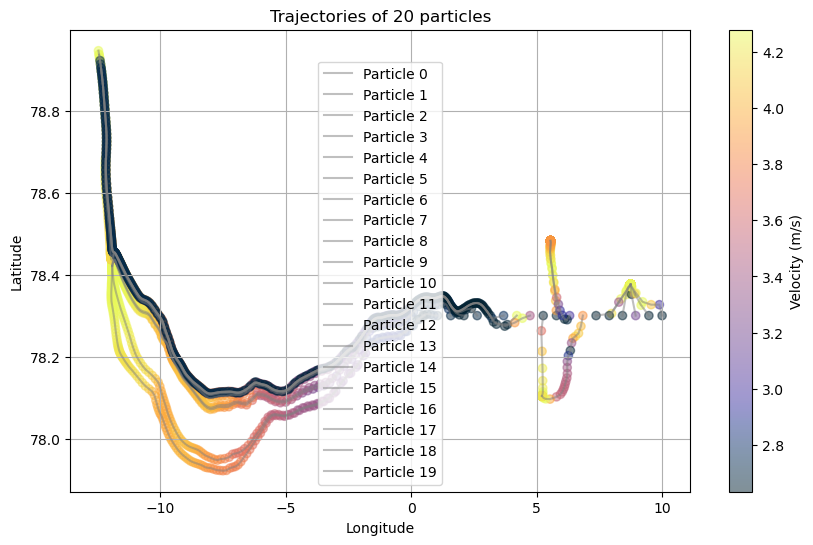

In [ ]:
#ds = xr.open_zarr(outfile)

plt.figure(figsize=(10,6))
ds_model[var1].isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap="coolwarm", vmin=vmin, vmax=vmax, add_colorbar=True)

for pid in ds.trajectory:
    plt.plot(ds.lon.sel(trajectory=pid), ds.lat.sel(trajectory=pid), label=f"Particle {pid.values}", color="grey", alpha=0.5)
    plt.scatter(ds.lon.sel(trajectory=pid), ds.lat.sel(trajectory=pid), c=ds.temperature.sel(trajectory=pid), cmap=cmo.cm.thermal, alpha=0.5) # 0,5 , vmin=-3.5, vmax=6
plt.colorbar(label="Velocity (m/s)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Trajectories of 20 particles")
plt.legend()
plt.grid(True)
plt.show()

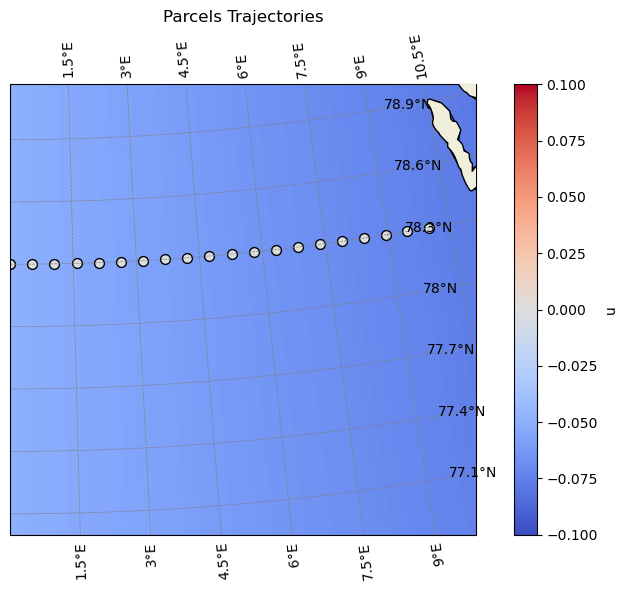

In [22]:
#vmin, vmax = -0.6, 0.6
vmin, vmax = -0.1, 0.1
#vmin, vmax = -1,5

var1 = "temp"
var2 = "temperature"

var1, var2 = "u", "u"


fig = plt.figure(figsize=(8, 6))
proj = ccrs.NorthPolarStereo()
ax = plt.axes(projection=proj)


# Set extent for Fram Strait (in degrees; note lat/lon in PlateCarree for setting extent)
#ax.set_extent([-20, 20, 75, 82], crs=ccrs.PlateCarree())
ax.set_extent([0, 10, 77, 79], crs=ccrs.PlateCarree())


ds_model[var1].isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap="coolwarm", vmin=vmin, vmax=vmax, add_colorbar=True)

# Add map features
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
ax.add_feature(cfeature.LAND, zorder=100, edgecolor='k')
ax.add_feature(cfeature.OCEAN)

# Plot each particle's trajectory
for pid in ds.trajectory:
    steps = 10
    #ax.scatter(ds.lon.sel(trajectory=pid)[::steps], ds.lat.sel(trajectory=pid)[::steps], c=ds.temperature.sel(trajectory=pid)[::steps], cmap="coolwarm", alpha=1, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), edgecolor='black', s=50) # 0,5 , vmin=-3.5, vmax=6
    ax.scatter(ds.lon.sel(trajectory=pid)[0], ds.lat.sel(trajectory=pid)[0], c=ds[var2].sel(trajectory=pid)[0], cmap="coolwarm", alpha=1, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), edgecolor='black', s=50) # 0,5 , vmin=-3.5, vmax=6

if False:
    ax.scatter(
    ds.lon.isel(obs=0),
    ds.lat.isel(obs=0),
    color='red',
    s=20,
    transform=ccrs.PlateCarree(),
    label="Start",
    marker="x"
)

plt.title("Parcels Trajectories")
#plt.legend()
plt.tight_layout()
plt.show()

## Plot Map with ETOPO Background

In [18]:
def get_colormap_colors(colormap='plasma', num_colors=20):
    # Create a linear space of values from 0 to 1
    values = np.linspace(0, 1, num_colors)
    
    # Get the colormap from matplotlib or try from cmocean
    try:
        cmap = plt.get_cmap(colormap)
    except ValueError:
        # If the colormap is not found, use cmocean
        cmap = getattr(cmo.cm, colormap)

    
    # Get the colors corresponding to the values
    colors = [cmap(val) for val in values]
    
    return colors

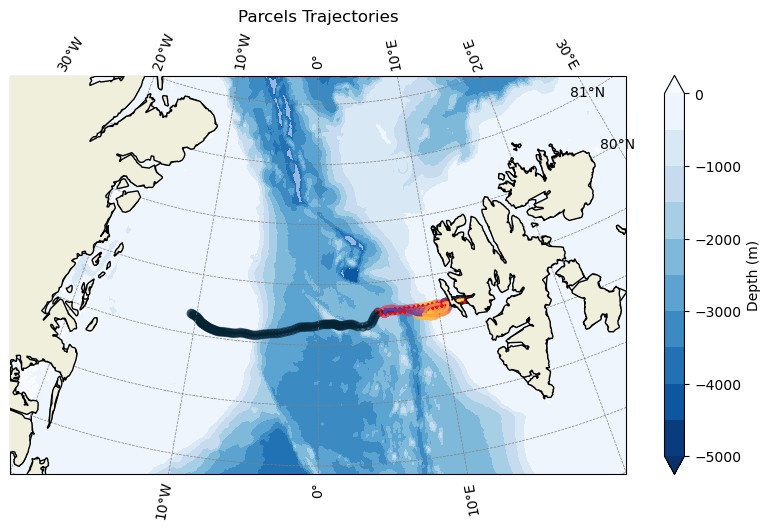

In [11]:
colors = get_colormap_colors(colormap='thermal', num_colors=20)

fig = plt.figure(figsize=(8, 6))
proj = ccrs.NorthPolarStereo()
ax = plt.axes(projection=proj)

# Set extent for Fram Strait (in degrees; note lat/lon in PlateCarree for setting extent)
ax.set_extent([-20, 20, 75, 82], crs=ccrs.PlateCarree())

# Plot the bathymetry
bathy_data = ds_fram_bath['z']
lon = ds_fram_bath['lon']
lat = ds_fram_bath['lat']

# Contourf or pcolormesh for bathymetry
cs = ax.contourf(
    lon, lat, bathy_data,
    levels=np.arange(-5000, 500, 500),
    cmap="Blues_r",
    extend='both',
    transform=ccrs.PlateCarree()
)

plt.colorbar(cs, ax=ax, orientation='vertical', label='Depth (m)', shrink=0.7)

# Add map features
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
ax.add_feature(cfeature.LAND, zorder=100, edgecolor='k')
ax.add_feature(cfeature.OCEAN)

# Plot each particle's trajectory
for pid, color in zip(ds.trajectory, colors):
    ax.plot(
        ds.lon.sel(trajectory=pid),
        ds.lat.sel(trajectory=pid),
        transform=ccrs.PlateCarree(),
        label=f"Particle {pid.values}",
        linewidth=2,
        color=color,
    )
    ax.scatter(ds.lon.sel(trajectory=pid), ds.lat.sel(trajectory=pid), c=ds.temperature.sel(trajectory=pid), cmap=cmo.cm.thermal, alpha=0.5, vmin=0, vmax=5, transform=ccrs.PlateCarree())


# Optional: mark starting locations
ax.scatter(
    ds.lon.isel(obs=0),
    ds.lat.isel(obs=0),
    color='red',
    s=20,
    transform=ccrs.PlateCarree(),
    label="Start",
    marker="x"
)

plt.title("Parcels Trajectories")
#plt.legend()
plt.tight_layout()
plt.show()